
#Fourth and final  Network 

#changes
1 -->  add learning rate scheduler

2 --> reduce parameters n constraint them within 15k

3--> check with diffrent number of batch size.


In [1]:
#loading libraries
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#loading libraries
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
#loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


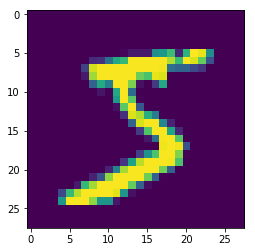

In [4]:
#plotting random image
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#resizing the images to 28x28x1
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#normalizing  the pixles
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [29]:
from keras.layers import Activation,BatchNormalization
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26  #3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24   #5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu')) # 22   #7
model.add(BatchNormalization())

model.add(Dropout(0.1))

#model.add(Convolution2D(10, 1, 1, activation='relu')) # 22
model.add(MaxPooling2D(pool_size=(2, 2))) # 11     ## 14

model.add(Convolution2D(8, 3, 3, activation='relu')) # 9   #16
model.add(BatchNormalization())
model.add(Dropout(0.1))
 
model.add(Convolution2D(16, 3, 3, activation='relu')) # 7 #18
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 5 #20
model.add(BatchNormalization())
model.add(Dropout(0.1))
#model.add(Convolution2D(10, 1, 1, activation='relu')) 


model.add(Convolution2D(10, 5)) # 1x10

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_31 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_31 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_32 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_32 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 22, 22, 16)        2320      
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [33]:
#fitting the model over train set and also checking the accuracy simultanously
model.fit(X_train, Y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 12s 207us/step - loss: 0.0472 - acc: 0.9855 - val_loss: 0.0342 - val_acc: 0.9898
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 12s 203us/step - loss: 0.0290 - acc: 0.9903 - val_loss: 0.0297 - val_acc: 0.9905
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 12s 194us/step - loss: 0.0244 - acc: 0.9922 - val_loss: 0.0281 - val_acc: 0.9913
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 12s 195us/step - loss: 0.0223 - acc: 0.9929 - val_loss: 0.0274 - val_acc: 0.9922
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

#Getting 99.43 accuracy under 13k parameters

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.02944346641272232, 0.9909]
